## 실습 1: aromawine 데이터로 히트맵 그린 후 vif 구하기
#### 종속변수는 Aroma, 나머지 변수들이 독립변수

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
wine = pd.read_excel('../data/wine_aroma.xlsx')
wine.head()

,Mo,Ba,Cr,Sr,Pb,B,Mg,Ca,K,Aroma
0,0.044,0.387,0.029,1.230,0.561,2.63,128.0,80.5,1130,3.3
1,0.160,0.312,0.038,0.975,0.697,6.21,193.0,75.0,1010,4.4
2,0.146,0.308,0.035,1.140,0.730,3.05,127.0,91.0,1160,3.9
3,0.191,0.165,0.036,0.927,0.796,2.57,112.0,93.6,924,3.9
4,0.363,0.380,0.059,1.130,1.730,3.07,138.0,84.6,1090,5.6


<AxesSubplot:>

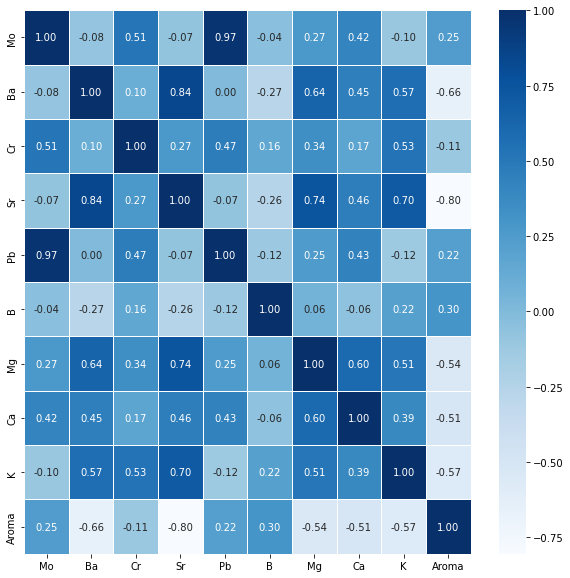

In [3]:
plt.figure(figsize=(10, 10))
sns.heatmap(data = wine.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [4]:
X = wine.drop(columns = ['Aroma'])
y = wine['Aroma']

In [5]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,85.311791,Mo
1,28.700675,Ba
2,18.610717,Cr
3,40.164814,Sr
4,95.631351,Pb
5,27.587390,B
6,61.935836,Mg
7,52.573653,Ca
8,94.803892,K


## 실습 2: aromawine 데이터로 ridge 회귀 진행하고, mse 값과 R^2 구하기 (alpha값 0.001, 0.01, 0.1)

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Ridge with alpha 0.1

In [7]:
wine = pd.read_excel('../data/wine_aroma.xlsx')
wine.head()

,Mo,Ba,Cr,Sr,Pb,B,Mg,Ca,K,Aroma
0,0.044,0.387,0.029,1.230,0.561,2.63,128.0,80.5,1130,3.3
1,0.160,0.312,0.038,0.975,0.697,6.21,193.0,75.0,1010,4.4
2,0.146,0.308,0.035,1.140,0.730,3.05,127.0,91.0,1160,3.9
3,0.191,0.165,0.036,0.927,0.796,2.57,112.0,93.6,924,3.9
4,0.363,0.380,0.059,1.130,1.730,3.07,138.0,84.6,1090,5.6


In [8]:
for alpha in (0.1, 0.01, 0.001):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    y_pred = ridge.predict(X)
    print(f'**Ridge with alpha={alpha}**')
    print('R^2: ', r2_score(y, y_pred))
    print('mse: ', mean_squared_error(y, y_pred))

**Ridge with alpha=0.1**
R^2:  0.7913950870210609
mse:  0.24513246766120322
**Ridge with alpha=0.01**
R^2:  0.8118385279980327
mse:  0.22110929839539978
**Ridge with alpha=0.001**
R^2:  0.8329643916469833
mse:  0.1962842115180633


## 실습 3: aromawine 데이터로 선형 회귀 모형 만들고 adjusted r^2 값 구하기

In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
wine = pd.read_excel('../data/wine_aroma.xlsx')
wine.head()

,Mo,Ba,Cr,Sr,Pb,B,Mg,Ca,K,Aroma
0,0.044,0.387,0.029,1.230,0.561,2.63,128.0,80.5,1130,3.3
1,0.160,0.312,0.038,0.975,0.697,6.21,193.0,75.0,1010,4.4
2,0.146,0.308,0.035,1.140,0.730,3.05,127.0,91.0,1160,3.9
3,0.191,0.165,0.036,0.927,0.796,2.57,112.0,93.6,924,3.9
4,0.363,0.380,0.059,1.130,1.730,3.07,138.0,84.6,1090,5.6


In [11]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [12]:
y_pred = lr.predict(X)

In [13]:
score = r2_score(y, y_pred)
print('R^2: ', score)
print('adjusted R^2: ', 1 - (1 - score) * (len(y) - X.shape[1] - 1))

R^2:  0.8354464499560966
adjusted R^2:  -1.4683032506585505
